# Continuous control with Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we solve Unity's Reacher environment using the DDPG algorithm.

### 1. Import the Necessary Packages

We commence by importing the required packages. (Notice that ddpg_agent.py encapsulates the details of the learning agent.):

In [1]:
import random
import torch
import numpy as np
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

from unityagents import UnityEnvironment

from ddpg_agent import Agent

### 2. Instantiate the Environment and Agent

Environments contain brains deciding which actions the agents should take. Here, we first work with the Reacher environment which contains a single agent. The first brain available is set as the default brain.

In [2]:
env = UnityEnvironment(file_name='/Users/Andreas/Documents/GitHub/deep-reinforcement-learning/p2_continuous-control/Reacher.app',worker_id=1, seed=1,no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 3. Examination of the state and action spaces

In this problem a single agent learns to move a double-jointed arm to reach to target locations.

The agent obtains a reward of +0.1 for each step that the agent's hand is in the targeted position. The overall goal of the agent is to keep its position exactly there for as long as possible.

The observation space has 33 variables which correspond to position, rotation, velocity, and angular velocities of the arm. The agent is allowed to take actions, each of which is a vector with four numbers. The action corresponds to the torque applied to two joints. The entries of the action vector vary continuously between between -1 and 1.

The following cell contains some overview information about the environment:

In [59]:
# reset the environment
#env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There is/are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There is/are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.94515800e+00 -1.00000000e+00
  5.35304594e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  7.49845982e-01]


### 4. Training of the agent with DDPG

The following function is responsible for the training of the agent. The agent is trained so that it uses its experience to gradually choose better actions over time. Once the agent reaches an average score of 30.0 over 100 consecutive episodes, the learned weights are saved to the checkpoint_actor.pth and checkpoint_critic.pth files and we are done. Notice that the details of the actor and critic part of the algorithm and their training are taken care of the model.py and ddpg_agent.py files.

We then initialize the agent, train it, define moving average functions (needed for plotting), and plot the results below.

In [6]:
def ddpg(n_episodes=2000, max_t=1500):
    
    scores_deque = deque(maxlen=100)
    scores_list = []
    max_score = -np.Inf
    
    for i_episode in range(1, n_episodes+1):
        
        
        # Per episode we have to reset the environment.
        env_info = env.reset(train_mode=True)[brain_name]
        # Per episode we have to get the current state.
        states = env_info.vector_observations        
        
        agent.reset()
        scores = np.zeros(num_agents)
        
        for t in range(max_t):
            actions = agent.act(states)
            
            env_info = env.step(actions)[brain_name]
            # We obtain the next state.
            next_states = env_info.vector_observations
            # We get the reward.
            rewards = env_info.rewards
            # We get the done status.
            dones = env_info.local_done

            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards

            if np.any(dones):
                break 
                
        score = np.mean(scores)
        scores_deque.append(score)
        scores_list.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score))
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        
        if np.mean(scores_deque) >= 30:  
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores_list

We proceed with the actual training of the agent. A plot of rewards per episode is included which illustrates that the agent is able to receive an average reward (over 100 episodes) of at least +30.0. We also report the number of episodes which are needed to solve the environment.

In [7]:
# We call the Agent class and initialize the learning agent and then start the learning algorithm.
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)
scores = ddpg()

/Users/Andreas/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Average Score: 0.36	Score: 0.36
Episode 2	Average Score: 0.26	Score: 0.16
Episode 3	Average Score: 0.47	Score: 0.90
Episode 4	Average Score: 0.52	Score: 0.67
Episode 5	Average Score: 1.00	Score: 2.89
Episode 6	Average Score: 1.06	Score: 1.39
Episode 7	Average Score: 1.00	Score: 0.66
Episode 8	Average Score: 1.09	Score: 1.68
Episode 9	Average Score: 1.15	Score: 1.68
Episode 10	Average Score: 1.14	Score: 1.03
Episode 11	Average Score: 1.08	Score: 0.47
Episode 12	Average Score: 1.14	Score: 1.76
Episode 13	Average Score: 1.16	Score: 1.48
Episode 14	Average Score: 1.22	Score: 1.92
Episode 15	Average Score: 1.31	Score: 2.65
Episode 16	Average Score: 1.35	Score: 1.85
Episode 17	Average Score: 1.41	Score: 2.43
Episode 18	Average Score: 1.45	Score: 2.15
Episode 19	Average Score: 1.47	Score: 1.84
Episode 20	Average Score: 1.42	Score: 0.39
Episode 21	Average Score: 1.45	Score: 2.10
Episode 22	Average Score: 1.45	Score: 1.50
Episode 23	Average Score: 1.52	Score: 3.01
Episode 24	Average S

Episode 185	Average Score: 28.70	Score: 31.16
Episode 186	Average Score: 28.83	Score: 22.17
Episode 187	Average Score: 28.95	Score: 21.46
Episode 188	Average Score: 29.10	Score: 28.78
Episode 189	Average Score: 29.24	Score: 32.95
Episode 190	Average Score: 29.41	Score: 38.00
Episode 191	Average Score: 29.64	Score: 31.10
Episode 192	Average Score: 29.63	Score: 25.21
Episode 193	Average Score: 29.77	Score: 35.09
Episode 194	Average Score: 29.95	Score: 28.50
Episode 195	Average Score: 29.90	Score: 22.82
Episode 196	Average Score: 29.83	Score: 24.78
Episode 197	Average Score: 30.06	Score: 32.05

Environment solved in 197 episodes!	Average Score: 30.06


In [44]:
# Define moving average functions for plotting below.
# moving averages https://www.quora.com/How-do-I-perform-moving-average-in-Python
def movingaverage(values,window):
    weights = np.repeat(1.0,window)/window
    smas = np.convolve(values,weights,'valid')
    return smas

def ExpMovingAverage(values,window):
    weights = np.exp(np.linspace(-1.,0.,window))
    weights /= weights.sum()
    
    emas = np.convolve(values,weights)[:len(values)]
    emas[:window] = emas[window]
    return emas


def Gaussianwindowsaverage(values):
    gaussian_func = lambda x, sigma: 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x**2)/(2*sigma**2))
    # Compute moving averages using window size sigma_lst
    sigma_lst = 3
    y_gau = np.zeros((1, len(values)))

    gau_x = np.linspace(-2.7*sigma_lst, 2.7*sigma_lst, 6*sigma_lst)
    gau_mask = gaussian_func(gau_x, sigma_lst)
    y_gau = np.convolve(values, gau_mask, 'same')
    
    return y_gau

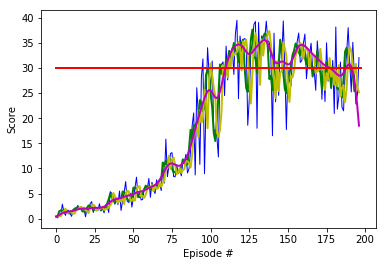

In [46]:
# We plot the scores over the number of episodes.
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(scores, 'b', lw=1)
plt.plot(movingaverage(scores,3), 'g', lw=2)
plt.plot(ExpMovingAverage(scores,3), 'y', lw=2)
plt.plot(Gaussianwindowsaverage(scores),'m',lw=2)
plt.plot([0, len(scores)], [30, 30], 'r', lw=2)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!

In the following code cell, one can load the trained weights from the files in order to watch the performance of the smart (i.e. trained) agent(s).

In [80]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]   # reset the environment
states = env_info.vector_observations                # get the current state(s)
scores = np.zeros(num_agents)                        # initialize the score(s)

while True:
    actions = agent.act(states)                      # select the action(s)
    env_info = env.step(actions)[brain_name]         # send the action(s) to the environment
    next_states = env_info.vector_observations       # get the next state(s)
    rewards = env_info.rewards                       # get the reward(s)
    dones = env_info.local_done                      # see if episode has finished
    scores += rewards                                # update the score(s)
    states = next_states                             # roll over the state to next time step
    if np.any(dones):                                # exit loop if episode is finished
        break
    
print("Score: {}".format(scores))                    # print the score(s) of the episode

Score: [32.40999928]


### 6. Closing the environment

In the last step, we close the environment.

In [ ]:
env.close()